In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from math import sqrt
import seaborn as sns
import graphviz
from graphviz import Source
from sklearn import tree
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)/Graphviz2.38/bin/'
import warnings
warnings.filterwarnings('ignore')

In [3]:
DIR = './Documents'
FILE = '/winequality-red.csv'

file = '{}{}'.format(DIR,FILE)

print('File directory: {}'.format(file))

File directory: ./Documents/winequality-red.csv


In [4]:
data = pd.read_csv('./Documents/winequality-red.csv')

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [7]:
data.shape

(1599, 12)

In [8]:
data.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

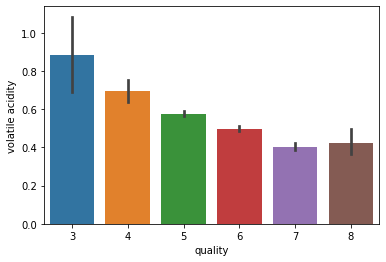

In [9]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = data)

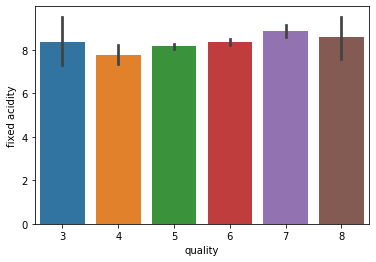

In [10]:
sns.barplot(x = 'quality', y = 'fixed acidity', data = data)

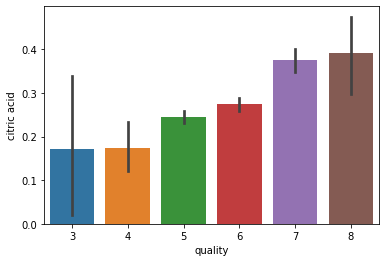

In [11]:
sns.barplot(x = 'quality', y = 'citric acid', data = data)

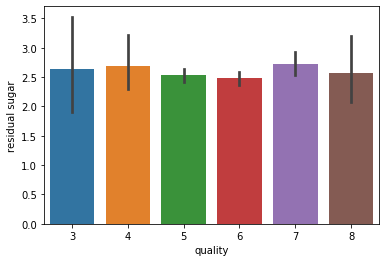

In [12]:
sns.barplot(x = 'quality', y = 'residual sugar', data = data)


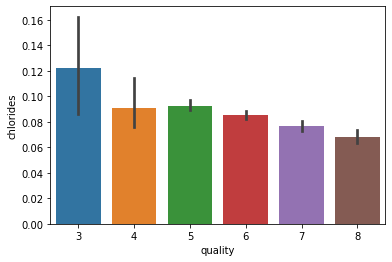

In [13]:
sns.barplot(x = 'quality', y = 'chlorides', data = data)

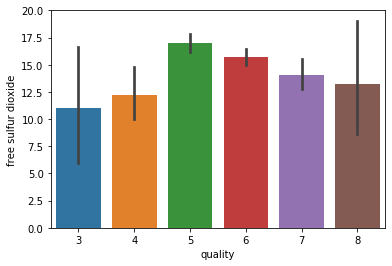

In [14]:
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = data)

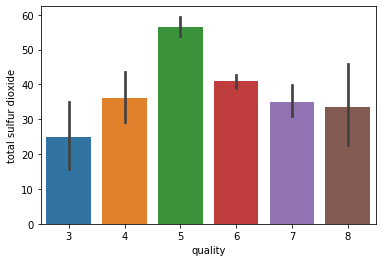

In [15]:
sns.barplot(x ='quality', y = 'total sulfur dioxide', data= data)

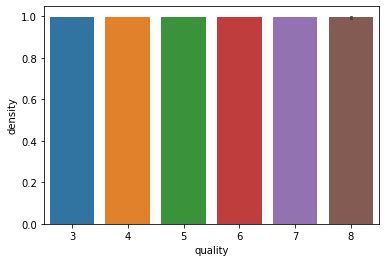

In [16]:
sns.barplot(x = 'quality', y = 'density', data = data)

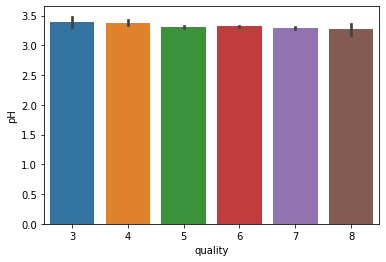

In [17]:
sns.barplot( x = 'quality', y = 'pH', data=data)

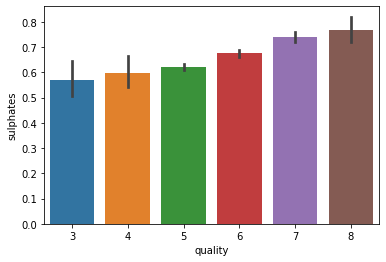

In [18]:
sns.barplot(x = 'quality', y = 'sulphates', data = data)

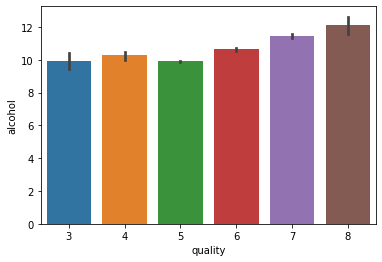

In [19]:
sns.barplot(x = 'quality', y ='alcohol', data = data)

In [20]:
#selecting the input and output features for regression tasks
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
            'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

In [21]:
target = ['quality']

In [22]:
#cheching for any null values in the dataset
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [23]:
#inisialization
X = data[features]
y = data[target]

In [24]:
#SPLITTING THE DATA INTO TEST AND TRAIN 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=200)

In [25]:
#Fit on train set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#Predict on test data
y_prediction = regressor.predict(X_test)
print(y_prediction[:10])
print('-'*50)
print(y_test[:10])

[[5.6362557 ]
 [5.73580131]
 [5.51754284]
 [5.48101339]
 [5.69866009]
 [4.20174276]
 [6.36821516]
 [5.36899847]
 [5.05858532]
 [5.16117307]]
--------------------------------------------------
      quality
366         7
1325        6
133         6
1418        5
1258        6
672         5
609         6
388         6
627         5
688         5


In [27]:
y_test.describe

<bound method NDFrame.describe of       quality
366         7
1325        6
133         6
1418        5
1258        6
...       ...
26          5
1257        6
717         5
1049        6
202         5

[528 rows x 1 columns]>

In [28]:
#evaluate the accuracy of linear regression using RMSe(root mean square error)
RMSE = sqrt(mean_squared_error(y_true=y_test, y_pred=y_prediction))
print(RMSE)

0.605381364047621


In [29]:
#Fit on a new regression model to train ste which is Decision Tree
regressor = DecisionTreeRegressor(max_depth=50)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=50, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [30]:
#perform prediction using decision tree
y_prediction = regressor.predict(X_test)
print(y_test[:10])
print(y_prediction[:10])

      quality
366         7
1325        6
133         6
1418        5
1258        6
672         5
609         6
388         6
627         5
688         5
[7. 6. 5. 5. 6. 5. 6. 6. 4. 6.]


In [31]:
#evaluate the accuracy using RMSE
RMSE = sqrt(mean_squared_error(y_true=y_test, y_pred=y_prediction))

In [32]:
print(RMSE)

0.7687061147858074


In [35]:
#classification model
from sklearn.tree import DecisionTreeClassifier

In [36]:
#copying the dataset into a new one
data_classifier = data.copy()

In [37]:
data_classifier.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [56]:
data_classifier['quality'].dtype

dtype('int64')

In [57]:
#convert the value in 1,2,3
data_classifier = [] 
for i in data['quality']:
    if i >= 1 and i <= 4:
        data_classifier.append('bad')
    elif i >= 5 and i <= 6:
        data_classifier.append('good')
    elif i >= 6 and i <= 8:
        data_classifier.append('excellent')
data['quality_label'] = data_classifier
X_train = data.drop(['quality', 'quality_label'] , axis = 1)
y_train = data['quality_label']

In [58]:
data['quality_label']

0       good
1       good
2       good
3       good
4       good
        ... 
1594    good
1595    good
1596    good
1597    good
1598    good
Name: quality_label, Length: 1599, dtype: object

In [59]:
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
            'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
target_classifier = ['quality_label']

In [60]:
X = data[features]
y = data[target_classifier]

In [61]:
#splitting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state=324)

In [62]:
#fit on train set
data_quality = DecisionTreeClassifier(max_leaf_nodes = 20, random_state=0)

In [63]:
data_quality.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

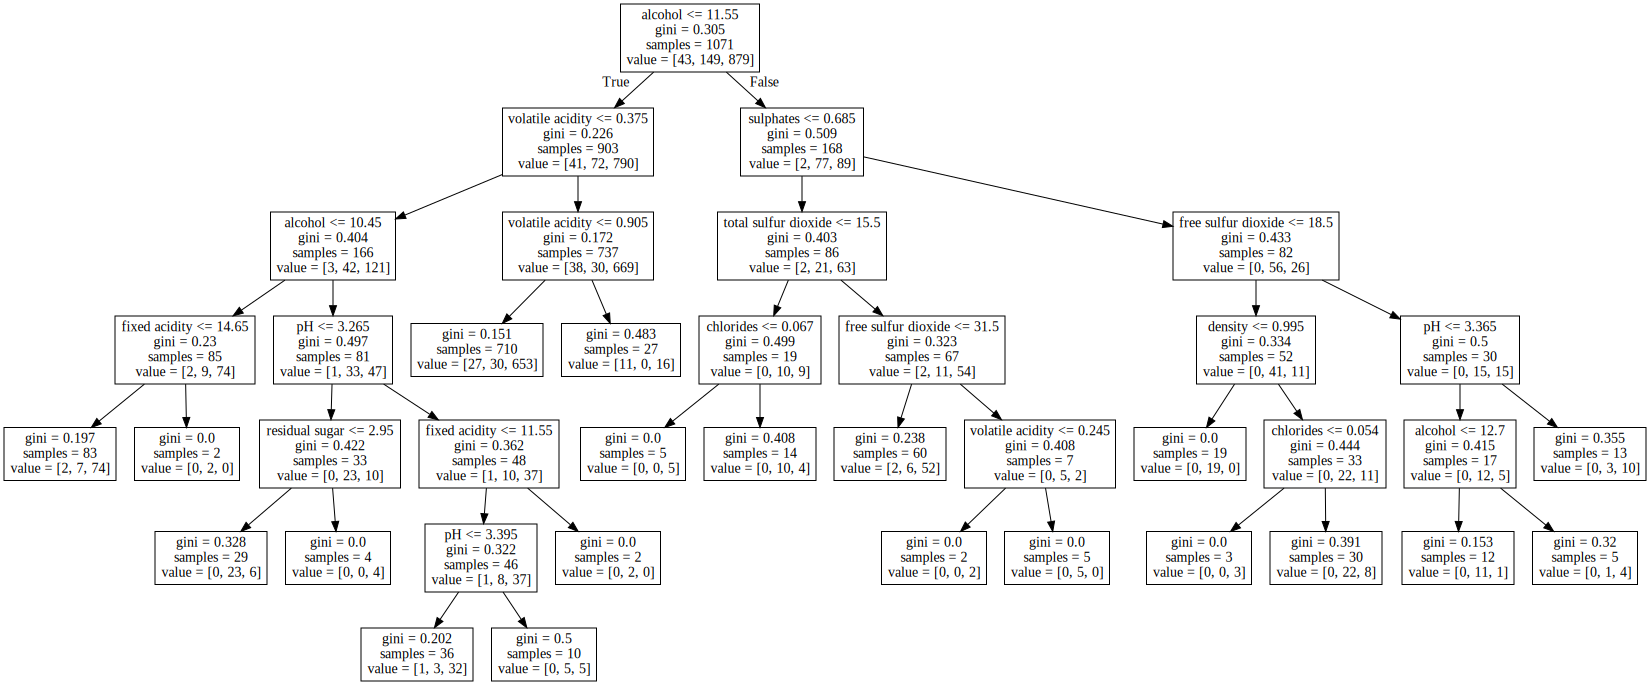

In [64]:
Source(tree.export_graphviz(data_quality, out_file=None, feature_names=X.columns))


In [65]:
#prediction on test data
prediction = data_quality.predict(X_test)
print(prediction[:10])
print('-'*20)
print(y_test['quality_label'][:10])

['good' 'good' 'good' 'excellent' 'good' 'good' 'good' 'good' 'good'
 'good']
--------------------
1144         good
1532         good
618          good
205     excellent
1384         good
884          good
523          good
879          good
791          good
37      excellent
Name: quality_label, dtype: object


In [66]:
data_read = export_text(data_quality, feature_names = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
            'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'])

In [67]:
print(data_read)

|--- alcohol <= 11.55
|   |--- volatile acidity <= 0.38
|   |   |--- alcohol <= 10.45
|   |   |   |--- fixed acidity <= 14.65
|   |   |   |   |--- class: good
|   |   |   |--- fixed acidity >  14.65
|   |   |   |   |--- class: excellent
|   |   |--- alcohol >  10.45
|   |   |   |--- pH <= 3.26
|   |   |   |   |--- residual sugar <= 2.95
|   |   |   |   |   |--- class: excellent
|   |   |   |   |--- residual sugar >  2.95
|   |   |   |   |   |--- class: good
|   |   |   |--- pH >  3.26
|   |   |   |   |--- fixed acidity <= 11.55
|   |   |   |   |   |--- pH <= 3.40
|   |   |   |   |   |   |--- class: good
|   |   |   |   |   |--- pH >  3.40
|   |   |   |   |   |   |--- class: excellent
|   |   |   |   |--- fixed acidity >  11.55
|   |   |   |   |   |--- class: excellent
|   |--- volatile acidity >  0.38
|   |   |--- volatile acidity <= 0.91
|   |   |   |--- class: good
|   |   |--- volatile acidity >  0.91
|   |   |   |--- class: good
|--- alcohol >  11.55
|   |--- sulphates <= 0.69
|   

In [68]:
#measure the accuracy
accuracy_score(y_true=y_test, y_pred=prediction)

0.8636363636363636

In [69]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

In [70]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,good
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,good
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,good
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,good


In [71]:
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
            'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
target_classifier = ['quality_label']

In [72]:
X = data[features]
y = data[target_classifier]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [81]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [75]:
prediction = logistic_regression.predict(X_test)
print(prediction[:10])
print(y_test[:10])

['good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good']
     quality_label
1144          good
1532          good
618           good
205      excellent
1384          good
884           good
523           good
879           good
791           good
37       excellent


In [76]:
#measure the accuracy
accuracy_score(y_true=y_test, y_pred=prediction)

0.8390151515151515